In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# T検定

$$ t　= \frac{\bar{x}-\mu}{\frac{u}{\sqrt{n}}} $$

- \bar{x}: 標本平均
- \mu: 母平均
- u**2: 不偏分散
- n: サンプル数


In [2]:
data = np.array([-1, -1, 0, 0, 1, 3, 5, 6, 7, 7])
kitaichi = sum(data)/len(data)
print(f'E(x) = {kitaichi}')

print(f'E(x) = {np.mean(data)}')

hyojunGosa = np.sqrt(np.var(data, ddof=1) / len(data))
print(f'V(x) = {np.sqrt(np.var(data, ddof=1))}')
print(f'標準誤差: {hyojunGosa}')

t_value = (kitaichi - 0) / hyojunGosa
print(f't_value = {t_value}')

# t_検定
# t_value => statistic=2.5861309700971096
# p_value => pvalue=0.02939946072683463
stats.ttest_1samp(data, popmean=0)

E(x) = 2.7
E(x) = 2.7
V(x) = 3.3015148038438356
標準誤差: 1.0440306508910548
t_value = 2.5861309700971096


Ttest_1sampResult(statistic=2.5861309700971096, pvalue=0.02939946072683463)

# ANOVA (Analysis Of Variance)

分散分析は、「選択肢を変えることによって、平均値(期待値)が変化するか」を検定したい時に利用する。

$$ F比　= \frac{効果の大きさ}{誤差の大きさ} = \frac{効果の分散の大きさ}{誤差の分散の大きさ} $$

例: F比を確認することにより、薬による影響が有意になるかを検証する

- Sample Code
https://www.reneshbedre.com/blog/anova.html


In [3]:
data = {
    'length': [2, 4, 10, 12, 6, 8],
    'medicine': ['A', 'A', 'B', 'B', 'C', 'C']
}
medicine_df = pd.DataFrame(data=data)
print('#####################################')
print('mean: {}'.format(medicine_df['length'].mean()))
print('#####################################')
print('mean for each medicine')
print(medicine_df.groupby('medicine').mean())
print('#####################################')

#####################################
mean: 7.0
#####################################
mean for each medicine
          length
medicine        
A            3.0
B           11.0
C            7.0
#####################################


In [4]:
import statsmodels.api as sm
fvalue, pvalue = stats.f_oneway(
    medicine_df[medicine_df['medicine'] == 'A']['length'],
    medicine_df[medicine_df['medicine'] == 'B']['length'],
    medicine_df[medicine_df['medicine'] == 'C']['length'],
)
print('f-value: {}, p-value: {}'.format(fvalue, pvalue))

f-value: 16.0, p-value: 0.025094573304390855


In [80]:
from statsmodels.formula.api import ols

model = ols('length ~ medicine', data=medicine_df).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
anova_table = sm.stats.anova_lm(model, typ=1)
# sum sq: 偏差平方和
# df: 自由度
# F: f-value
# PR(>F): p-value
# Residual: 残差
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
medicine,2.0,64.0,32.0,16.0,0.025095
Residual,3.0,6.0,2.0,NaN,NaN


# 分散分析とモデル選択

上記のANOVA(=分散分析)では、以下のようなモデルを現した

$$ この魚の体長 = 平均の魚の体長 + 薬による上方(下方)効果 + 効果 $$

例えば、以下のようなモデルを比較して、どちらが良いモデルなのかを選択する作業
- Model1: この魚の体長 = 平均の魚の体長 + 薬による上方(下方)効果 + 誤差(1)
- Model2: この魚の体長 = 平均の魚の体長 + 誤差(2)  --- 薬の効果を誤差内に含むモデル

左辺が等しいため: 薬による上方(下方)効果 = 誤差(2) - 誤差(1) が成り立つ

よって、薬の効果は、"薬の影響を無視したモデルの誤差 - 薬の影響を加味したモデルの誤差" によって求めることが可能

$$ model1: x_{ij} = \beta_0 + \beta_i + \epsilon{ij} $$
$$ model2: x_{ij} = \beta_0 + \epsilon{ij} $$

```
\beta_0: 期待値
\beta_i: 薬iの効果
\epsilon_{ij} 薬iのj番目の誤差
```


In [81]:
model_1 = ols('length ~ medicine', data=medicine_df).fit()
# 効果がない場合、1を入れておく
model_2 = ols('length ~ 1', data=medicine_df).fit()
# TODO: 以下の順番にmodelを入れないと正確にF-valueを出せない
sm.stats.anova_lm(model_2, model_1, typ=1)
# df_resid: 誤差の分散の自由度
# ssr: 誤差の偏差平方和
# ss_diff: 残差平方和の差

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,5.0,70.0,0.0,NaN,NaN,NaN
1,3.0,6.0,2.0,64.0,16.0,0.025095


# 回帰分析

"ある値が変化することによって、興味の対象がどれだけ変化するか"をモデル化する手法

例: 最小二乗法が最も一般的だから、とりあえず最小二乗法を利用した回帰モデルを作成



切片: 1.9999999999999991
傾き: [1.]


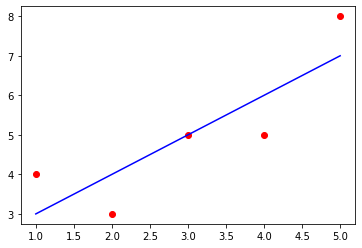

In [58]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = {
    'beer': [4, 3, 5, 5, 8],
    'temperature': [1, 2, 3, 4, 5]
}

beer_df = pd.DataFrame(data=data)
X = beer_df['temperature'].values.reshape(-1, 1)
y = beer_df['beer']
model_a = LinearRegression().fit(X, y)
print('切片:', model_a.intercept_)
print('傾き:', model_a.coef_)
predicted_a = model_a.predict(X)

# model_b = ols('beer ~ C(temperature)', data=beer_df).fit()
# predicted_b = model_b.predict(beer_df['temperature'])

plt.scatter(X, y, c='red')
# plt.ylabel("beer")
# plt.xlabel("temperature")
plt.plot(X, predicted_a, c='blue')
# plt.plot(X, predicted_b, c='yellow')
plt.show()

## 回帰分析の検定

回帰分析の有意性を確認することで、たまたまでないことを保証するために検定する

例: ビールの売り上げは気温の影響を受けていることがたまたまでないことを保証する

- 手法
    - データを変化と誤差にわける方法(= ANOVAで実施した手法)
    - 気温が入っているモデル, 気温が入っていないモデルの残差を比較する(= モデル選択と同様の手法)

$$ model_1: ビールの売上 = 気温の効果 + 切片 + 誤差(1) $$
$$ model_1: ビールの売上 = 切片 + 誤差(2) $$

今回のケースでは、f-value=0.07...となり棄却域に落ちないため、気温による影響を受けると結論できない

In [87]:
# ANOVA
anova = ols('beer ~ temperature', data=beer_df).fit()
sm.stats.anova_lm(anova, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
temperature,1.0,10.0,10.000000,7.5,0.071422
Residual,3.0,4.0,1.333333,NaN,NaN


In [88]:
# モデル選択
model_1 = ols('beer ~ temperature', data=beer_df).fit()
model_2 = ols('beer ~ 1', data=beer_df).fit()
sm.stats.anova_lm(model_2, model_1, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,4.0,14.0,0.0,NaN,NaN,NaN
1,3.0,4.0,1.0,10.0,7.5,0.071422


## 決定係数(R^2)について

データ全体に占める効果の大きさを表すことが可能になる

`R^2 = 1`のとき、すべてをモデルの中に入っている効果で表すことができる

$$ R^2 = \frac{効果の偏差平方和}{誤差の偏差平方和 + 効果の偏差平方和} $$

In [89]:
model_1.summary()

/Users/k-kakimoto/dev/ml_samples/.venv/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     7.500
Date:                Sun, 18 Sep 2022   Prob (F-statistic):             0.0714
Time:                        12:09:28   Log-Likelihood:                -6.5368
No. Observations:                   5   AIC:                             17.07
Df Residuals:                       3   BIC:                             16.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0000      1.211      1.651      0.197      -1.854       5.854
temperature     1.0000      0.365      2.739      0.071      -0.162       2.162
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.500
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.638
Skew:                          -0.000   Prob(JB):                        0.727
Kurtosis:                       1.250   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""